## IVADO Musuem Analysis Notebook
Claire Phillips 
2023

The following notebook:

• evaluates and cleans the data in https://en.wikipedia.org/wiki/List_of_most-visited_museums wikipedia page

• evaluates and cleans sources of city population data.

• preforms a linear regression on museum and city population data


import packages

In [1]:
import pandas as pd
import os
import re
import functools
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import locale

get data from list of most visited museums wikipedia page

In [2]:

url = "https://en.wikipedia.org/wiki/List_of_most-visited_museums"
museum_df = pd.read_html(url)[0]

In [3]:
museum_df

,Name,Location,Number of visitors
0,Louvre,"Paris, France","7,800,000[7]"
1,Galleria degli Uffizi,"Florence, Italy","4,000,000[8]"
2,National Museum of Natural History,"Washington, D.C., United States","3,900,000[9]"
3,Musée d'Orsay,"Paris, France","3,200,000[10]"
4,Centre Pompidou,"Paris, France","3,000,000[11]"
5,Hermitage Museum,"Saint Petersburg, Russia","2,700,000[12]"
6,Prado Museum,"Madrid, Spain","2,500,000[13]"
7,Smithsonian Museum of American History,"Washington, D.C., United States","1,800,000[14]"
8,National Air and Space Museum,"Washington, D.C., United States","1,486,000[15]"


In [4]:
museum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                9 non-null      object
 1   Location            9 non-null      object
 2   Number of visitors  9 non-null      object
dtypes: object(3)
memory usage: 344.0+ bytes


get population data from list of largest cities wikipedia page

In [5]:
pop_url = "https://en.wikipedia.org/wiki/List_of_largest_cities"
pop_table = pd.read_html(pop_url)[1]

In [6]:
pop_table.columns = pop_table.columns.droplevel(0)

In [7]:
pop_table

,City[a],Country,UN 2018 population estimates[b],Definition,Population,Area.mw-parser-output .nobold{font-weight:normal}(km2),Density(/km2),Population,Area(km2),Density(/km2),Population,Area(km2),Density(/km2)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tokyo,Japan,37468000.0,Metropolis prefecture,13515271,2191,"6,169[13]",37732000,8231,"4,584[e]",37274000,13452,"2,771[14]"
2,Delhi,India,28514000.0,Capital City,16753235,1484,"11,289[15]",32226000,2344,"13,748[f]",29000000,3483,"8,326[16]"
3,Shanghai,China,25582000.0,Municipality,24870895,6341,"3,922[17][18]",24073000,4333,"5,556[g]",—,—,—
4,São Paulo,Brazil,21650000.0,Municipality,12252023,1521,"8,055[19]",23086000,3649,"6,327[h]",21734682,7947,"2,735[20]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Washington,United States,5207000.0,Federal district,702455,177,"3,969[29]",7631000,5501,"1,387[s]",6263245,17009,368[94]
78,Yangon,Myanmar,5157000.0,City,—,—,—,6874000,666,10321,—,—,—
79,Alexandria,Egypt,5086000.0,Urban governorate,—,—,—,4712000,293,16082,—,—,—
80,Jinan,China,5052000.0,City (sub-provincial),8700000,10244,849,4017000,932,4310,—,—,—


In [8]:
pop_table[['City[a]','Country','Population']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City[a]     81 non-null     object
 1   Country     81 non-null     object
 2   Population  81 non-null     object
 3   Population  81 non-null     object
 4   Population  81 non-null     object
dtypes: object(5)
memory usage: 3.3+ KB


In [9]:
def get_city_country(pair):
    list_pair = pair.split(", ")
    return [list_pair[0],list_pair[-1]]

In [10]:
museum_df[['City','Country']]=museum_df['Location'].apply(lambda x: get_city_country(x)).to_list()

In [11]:
locale.setlocale(locale.LC_ALL, '')

museum_df['visitor_cleaned'] = museum_df['Number of visitors'].str.split('[', 1, expand=True)[0].apply(lambda x: locale.atof(x))


In [12]:
locale.atof('7,800,000')

7800000.0

In [13]:
museum_df

,Name,Location,Number of visitors,City,Country,visitor_cleaned
0,Louvre,"Paris, France","7,800,000[7]",Paris,France,7800000.0
1,Galleria degli Uffizi,"Florence, Italy","4,000,000[8]",Florence,Italy,4000000.0
2,National Museum of Natural History,"Washington, D.C., United States","3,900,000[9]",Washington,United States,3900000.0
3,Musée d'Orsay,"Paris, France","3,200,000[10]",Paris,France,3200000.0
4,Centre Pompidou,"Paris, France","3,000,000[11]",Paris,France,3000000.0
5,Hermitage Museum,"Saint Petersburg, Russia","2,700,000[12]",Saint Petersburg,Russia,2700000.0
6,Prado Museum,"Madrid, Spain","2,500,000[13]",Madrid,Spain,2500000.0
7,Smithsonian Museum of American History,"Washington, D.C., United States","1,800,000[14]",Washington,United States,1800000.0
8,National Air and Space Museum,"Washington, D.C., United States","1,486,000[15]",Washington,United States,1486000.0


join the meseum df and population df

In [14]:
wiki_pop_merge = museum_df.merge(pop_table,left_on=['City','Country'], right_on=['City[a]','Country'])

In [15]:
wiki_pop_merge[['Location','visitor_cleaned','UN 2018 population estimates[b]']]

,Location,visitor_cleaned,UN 2018 population estimates[b]
0,"Paris, France",7800000.0,10901000.0
1,"Paris, France",3200000.0,10901000.0
2,"Paris, France",3000000.0,10901000.0
3,"Washington, D.C., United States",3900000.0,5207000.0
4,"Washington, D.C., United States",1800000.0,5207000.0
5,"Washington, D.C., United States",1486000.0,5207000.0
6,"Saint Petersburg, Russia",2700000.0,5383000.0
7,"Madrid, Spain",2500000.0,6497000.0


In [16]:
length = wiki_pop_merge.shape[0]
x = wiki_pop_merge['visitor_cleaned'].values
y = wiki_pop_merge['UN 2018 population estimates[b]'].values
x = x.reshape(length, 1)
y = y.reshape(length, 1)

In [17]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

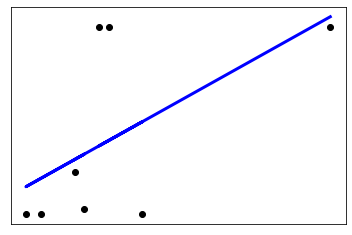

In [18]:
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()


the mean absolute error is 1,768,649

In [19]:
mean_absolute_error(y, regr.predict(x))

1768649.7959318026

In [20]:
print("coefficient ",regr.coef_)
print("intercept ", regr.intercept_)

coefficient  [[0.81613918]]
intercept  [4833668.95907119]


In [21]:
print('wiki ',wiki_pop_merge.shape[0])
print('meseum data ',museum_df.shape[0])

wiki  8
meseum data  9


one city is missing from the population table, so going to look at other sources

In [22]:
museum_df['City'] = museum_df['City'].str.lower()
museum_df['Country'] = museum_df['Country'].str.lower()

found downloadable data from the UN on city populations

In [23]:
un_data = pd.read_csv(r'/Users/clairephillips/Desktop/IVADO PROJECT/UNdata_Export_20230308_220221493.csv')

/Users/clairephillips/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


UN data is very messy, looking at the context of the datafame

not every entery in the year column is a year

In [24]:
un_data['Year'].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2000, 2003, 1998, 2006, 2005, 2001, 1991,
       2004, 1980, 1999, 2002, 2022, 1992, 1996, 1990, 1987, 1976, 1988,
       1993, 1984, 1983, 1986, 1981, 1995, 1970, 1997, 1989, 1985, '2012',
       '2010', '2009', '2008', '2007', '2005', '2000', '2022', '2021',
       '2020', '2019', '2018', '2017', '2016', '2015', '2011', '2006',
       '2003', '2001', '1999', '1998', '1996', '2004', '1994', '2002',
       '1992', 'Footnote',
       'Population statistics are compiled from registers.',
       'Statistics are compiled from registers.',
       'Including armed forces stationed in the area.',
       'Data based on the 2010 Population Census.',
       'The urban agglomeration of Buenos Aires includes the city of Buenos Aires, and the 24 parts of the Buenos Aires province; among them, General San Martín, La Matanza, Lanús, Lomas de Zamora, Morón, Quilmes, San Fernando, San Isidro y Vicent

not every entery in country or area is a proper country / area.  Also Russia and United states are in different forms than from the mesuems_df 

In [25]:
un_data['Country or Area'].unique()

array(['Åland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Canada',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Czechia',
       "Democratic People's Republic of Korea", 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
    

The city values also have a different form than from museums_df

In [26]:
list(un_data[un_data['Country or Area']=='United States of America']['City'].unique())

['Abilene (TX)',
 'Akron (OH)',
 'Albuquerque (NM)',
 'Alexandria (VA)',
 'Allen (TX)',
 'Allentown (PA)',
 'Amarillo (TX)',
 'Anaheim (CA)',
 'Anchorage (AK)',
 'Ann Arbor (MI)',
 'Antioch (CA)',
 'Arlington (TX)',
 'Arvada (CO)',
 'Athens (GA)',
 'Atlanta (GA)',
 'Augusta (GA)',
 'Aurora (CO)',
 'Aurora (IL)',
 'Austin (TX)',
 'Bakersfield (CA)',
 'Baltimore (MD)',
 'Baton Rouge (LA)',
 'Beaumont (TX)',
 'Bellevue (WA)',
 'Bend (OR)',
 'Berkeley (CA)',
 'Billings (MT)',
 'Birmingham (AL)',
 'Boise City (ID)',
 'Boston (MA)',
 'Boulder (CO)',
 'Bridgeport (CT)',
 'Brockton (MA)',
 'Broken Arrow (OK)',
 'Brownsville (TX)',
 'Buckeye (AZ)',
 'Buffalo (NY)',
 'Burbank (CA)',
 'Carlsbad (CA)',
 'Carmel (IN)',
 'Cambridge (MA)',
 'Cape Coral (FL)',
 'Carrollton (TX)',
 'Cary (NC)',
 'Cedar Rapids (IA)',
 'Centennial (CO)',
 'Chandler (AZ)',
 'Charleston (SC)',
 'Charlotte (NC)',
 'Chattanooga (TN)',
 'Chesapeake (VA)',
 'Chicago (IL)',
 'Chico (CA)',
 'Chula Vista (CA)',
 'Cincinnati (OH)'

creating a mapping of mismatched country and city enteries between the two sources

In [27]:
clean_dict = {'Country':
              {'Russian Federation':'Russia',
               'United States of America':'United States'},
              'City':
              {'Firenze':'florence',
               'St. Petersburg':'Saint Petersburg'}
             }

getting the most recent entry for each city in UN data.  The years arent the same as from museums df.  This was also the case for the population table from wikipedia

In [31]:
un_data['numeric_year']=un_data['Year'].apply(lambda x: int(x) if str(x).isnumeric() else 0)
un_data['City']=un_data['City'].str.split(' \(', 1, expand=True)[0]
un_data['City']=un_data['City'].apply(lambda x: clean_dict['City'][x] if x in clean_dict['City'].keys() else x)
un_data['Country or Area']=un_data['Country or Area'].apply(lambda x: clean_dict['Country'][x] if x in clean_dict['Country'].keys() else x)
one_record = un_data[((un_data['Reliability']=='Final figure, complete'))&(un_data['City type']=='City proper')&(un_data['Sex'].astype('str')=='Both Sexes')].sort_values(by=['City','Country or Area','numeric_year'], ascending=False).groupby(['City','Country or Area']).first().reset_index()

one_record['City'] = one_record['City'].str.lower()
one_record['Country or Area'] = one_record['Country or Area'].str.lower()

A lot of cities listed in UN data

In [101]:
one_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4517 entries, 0 to 4516
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             4517 non-null   object 
 1   Country or Area  4517 non-null   object 
 2   Year             4517 non-null   object 
 3   Area             4517 non-null   object 
 4   Sex              4517 non-null   object 
 5   City type        4517 non-null   object 
 6   Record Type      4517 non-null   object 
 7   Reliability      4517 non-null   object 
 8   Source Year      4517 non-null   float64
 9   Value            4517 non-null   float64
 10  Value Footnotes  2264 non-null   object 
 11  numeric_year     4517 non-null   int64  
dtypes: float64(2), int64(1), object(9)
memory usage: 423.6+ KB


In [85]:
museum_df.merge(one_record,left_on=['City','Country'], right_on=['City','Country or Area'])

,Name,Location,Number of visitors,City,Country,visitor_cleaned,Country or Area,Year,Area,Sex,City type,Record Type,Reliability,Source Year,Value,Value Footnotes,numeric_year
0,Louvre,"Paris, France","7,800,000[7]",paris,france,7800000.0,france,2015,Total,Both Sexes,City proper,Census - de jure - complete tabulation,"Final figure, complete",2018.0,2206488.0,22,2015
1,Musée d'Orsay,"Paris, France","3,200,000[10]",paris,france,3200000.0,france,2015,Total,Both Sexes,City proper,Census - de jure - complete tabulation,"Final figure, complete",2018.0,2206488.0,22,2015
2,Centre Pompidou,"Paris, France","3,000,000[11]",paris,france,3000000.0,france,2015,Total,Both Sexes,City proper,Census - de jure - complete tabulation,"Final figure, complete",2018.0,2206488.0,22,2015
3,Galleria degli Uffizi,"Florence, Italy","4,000,000[8]",florence,italy,4000000.0,italy,2020,Total,Both Sexes,City proper,Estimate - de jure,"Final figure, complete",2021.0,367673.0,NaN,2020
4,National Museum of Natural History,"Washington, D.C., United States","3,900,000[9]",washington,united states,3900000.0,united states,2021,Total,Both Sexes,City proper,Estimate - de jure,"Final figure, complete",2022.0,670050.0,"18,193",2021
5,Smithsonian Museum of American History,"Washington, D.C., United States","1,800,000[14]",washington,united states,1800000.0,united states,2021,Total,Both Sexes,City proper,Estimate - de jure,"Final figure, complete",2022.0,670050.0,"18,193",2021
6,National Air and Space Museum,"Washington, D.C., United States","1,486,000[15]",washington,united states,1486000.0,united states,2021,Total,Both Sexes,City proper,Estimate - de jure,"Final figure, complete",2022.0,670050.0,"18,193",2021
7,Hermitage Museum,"Saint Petersburg, Russia","2,700,000[12]",saint petersburg,russia,2700000.0,russia,2012,Total,Both Sexes,City proper,Estimate - de jure,"Final figure, complete",2013.0,4990602.0,"164,165",2012
8,Prado Museum,"Madrid, Spain","2,500,000[13]",madrid,spain,2500000.0,spain,2020,Total,Both Sexes,City proper,Estimate - de jure,"Final figure, complete",2021.0,3320069.0,"76,97",2020


In [86]:
data_to_use = museum_df.merge(one_record,left_on=['City','Country'], 
                              right_on=['City','Country or Area'])[['Name','Location','visitor_cleaned','Value']]



The UN data is from various years, but covers all the cities in the meseums df.

In [87]:
data_to_use

,Name,Location,visitor_cleaned,Value
0,Louvre,"Paris, France",7800000.0,2206488.0
1,Musée d'Orsay,"Paris, France",3200000.0,2206488.0
2,Centre Pompidou,"Paris, France",3000000.0,2206488.0
3,Galleria degli Uffizi,"Florence, Italy",4000000.0,367673.0
4,National Museum of Natural History,"Washington, D.C., United States",3900000.0,670050.0
5,Smithsonian Museum of American History,"Washington, D.C., United States",1800000.0,670050.0
6,National Air and Space Museum,"Washington, D.C., United States",1486000.0,670050.0
7,Hermitage Museum,"Saint Petersburg, Russia",2700000.0,4990602.0
8,Prado Museum,"Madrid, Spain",2500000.0,3320069.0


In [88]:
length = data_to_use.shape[0]
x = data_to_use['visitor_cleaned'].values
y = data_to_use['Value'].values
x = x.reshape(length, 1)
y = y.reshape(length, 1)

In [89]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

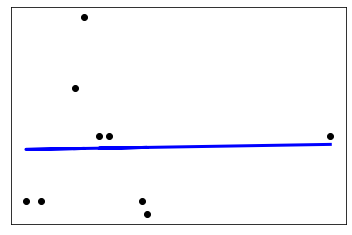

In [90]:
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()


In [91]:
mean_absolute_error(y, regr.predict(x))

1171423.4656630242

In [92]:
print("coefficient ",regr.coef_)
print("intercept ", regr.intercept_)

coefficient  [[0.0186284]]
intercept  [1860212.83729588]


In [102]:
pd.__version__

'1.1.2'

From the results of the UN data from the UN Data export vs the wikipedia population data, the better trend line seems to come from the UN data export.  Even though the year for this data is not all the same, it will be used over the wikipedia data.